In [25]:
import pandas as pd
import numpy as np

energy = pd.read_excel("C:/Users/panis/OneDrive/Рабочий стол/year3/Python/Lab3_Datasetі/En_In.xls", skiprows=17, skipfooter=38)

energy = energy.iloc[:, 2:]

energy.columns = ['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable']

energy['Energy Supply'] = energy['Energy Supply'].apply(
    lambda x: np.nan if isinstance(x, str) and "..." in x else x * 1000000
)
energy['Country'] = energy['Country'].str.replace(r"\d+|\(.*\)", "", regex=True).str.strip()
rename_countries = {
    "Republic of Korea": "South Korea",
    "United States of America": "United States",
    "United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
    "China, Hong Kong Special Administrative Region": "Hong Kong"
}
energy['Country'] = energy['Country'].replace(rename_countries)





In [26]:
energy.loc[energy ['Country'].isin(['American Samoa', 'South Korea', 'Bolivia' ])]

,Country,Energy Supply,Energy Supply per Capita,% Renewable
3,American Samoa,NaN,...,0.641026
24,Bolivia,3.360000e+08,32,31.477120
164,South Korea,1.100700e+10,221,2.279353


In [27]:
gdp = pd.read_csv("C:/Users/panis/OneDrive/Рабочий стол/year3/Python/Lab3_Datasetі/gpd.csv", skiprows=4)

rename_gdp_countries = {
    "Korea, Rep.": "South Korea",
    "Iran, Islamic Rep.": "Iran",
    "Hong Kong SAR, China": "Hong Kong"
}
gdp['Country Name'] = gdp['Country Name'].replace(rename_gdp_countries)

gdp.head()


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Aruba,ABW,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.467704e+09,NaN,NaN,NaN,NaN,NaN
1,Andorra,AND,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,4.018196e+09,4.021331e+09,3.675728e+09,3.535389e+09,3.346317e+09,3.185605e+09,3.129538e+09,3.127550e+09,NaN,NaN
2,Afghanistan,AFG,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.030523e+10,1.172119e+10,1.214448e+10,1.469733e+10,1.593680e+10,1.691113e+10,1.935220e+10,1.973134e+10,1.999032e+10,2.029415e+10
3,Angola,AGO,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,5.581103e+10,6.842044e+10,7.787420e+10,7.975320e+10,8.247091e+10,8.570262e+10,9.012096e+10,9.626143e+10,1.008863e+11,1.039106e+11
4,Albania,ALB,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,9.771760e+09,1.034829e+10,1.112752e+10,1.150029e+10,1.192695e+10,1.223109e+10,1.240477e+10,1.254247e+10,1.279331e+10,1.312082e+10


In [33]:
scimago = pd.read_excel("C:/Users/panis/OneDrive/Рабочий стол/year3/Python/Lab3_Datasetі/scimagojr.xlsx")

scimago_filtered = scimago[scimago['Rank'] <= 15].copy()

gdp_filtered = gdp[['Country Name'] + [str(year) for year in range(2006, 2016)]].copy()  
gdp_filtered.rename(columns={'Country Name': 'Country'}, inplace=True)

# 3. Злиття Scimago та Energy на основі країни
merged_data = pd.merge(scimago_filtered, energy, how='inner', on='Country')

# 4. Злиття результату з GDP
final_data = pd.merge(merged_data, gdp_filtered, how='inner', on='Country')

# 5. Встановлення індексу за назвою країни
final_data.set_index('Country', inplace=True)

# 6. Вибір потрібних стовпців
columns_to_keep = ['Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations', 
                   'Citations per document', 'H index', 'Energy Supply', 'Energy Supply per Capita', 
                   '% Renewable'] + [str(year) for year in range(2006, 2016)]
final_data = final_data[columns_to_keep]

final_data.head()

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,,,,,
China,1,127050,126767,597237,411683,4.70,138,1.271910e+11,93,19.75491,3.992331e+12,4.559041e+12,4.997775e+12,5.459247e+12,6.039659e+12,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12
United States,2,96661,94747,792274,265436,8.20,230,9.083800e+10,286,11.57098,1.479230e+13,1.505540e+13,1.501149e+13,1.459484e+13,1.496437e+13,1.520402e+13,1.554216e+13,1.577367e+13,1.615662e+13,1.654857e+13
Japan,3,30504,30287,223024,61554,7.31,134,1.898400e+10,149,10.23282,5.496542e+12,5.617036e+12,5.558527e+12,5.251308e+12,5.498718e+12,5.473738e+12,5.569102e+12,5.644659e+12,5.642884e+12,5.669563e+12
United Kingdom,4,20944,20357,206091,37874,9.84,139,7.920000e+09,124,10.60047,2.419631e+12,2.482203e+12,2.470614e+12,2.367048e+12,2.403504e+12,2.450911e+12,2.479809e+12,2.533370e+12,2.605643e+12,2.666333e+12
Russian Federation,5,18534,18301,34266,12422,1.85,57,3.070900e+10,214,17.28868,1.385793e+12,1.504071e+12,1.583004e+12,1.459199e+12,1.524917e+12,1.589943e+12,1.645876e+12,1.666934e+12,1.678709e+12,1.616149e+12


In [32]:
final_data.shape

(15, 20)

In [34]:
def average_gdp(df):
    gdp_columns = [str(year) for year in range(2006, 2016)]
    avg_gdp = df[gdp_columns].mean(axis=1)
    return avg_gdp.sort_values(ascending=False)

avg_gdp = average_gdp(final_data)
print(avg_gdp)


Country
United States         1.536434e+13
China                 6.348609e+12
Japan                 5.542208e+12
Germany               3.493025e+12
France                2.681725e+12
United Kingdom        2.487907e+12
Brazil                2.189794e+12
Italy                 2.120175e+12
India                 1.769297e+12
Canada                1.660647e+12
Russian Federation    1.565459e+12
Spain                 1.418078e+12
Australia             1.164043e+12
South Korea           1.106715e+12
Iran                  4.441558e+11
dtype: float64


In [35]:
def gdp_change(df):
    avg_gdp = average_gdp(df)
    fifth_country = avg_gdp.index[4]
    change = df.loc[fifth_country, '2015'] - df.loc[fifth_country, '2006']
    return (fifth_country, change)

gdp_diff = gdp_change(final_data)
print(gdp_diff)


('France', 153345695364.24023)


In [38]:
def max_renewable(df):
    max_country = df['% Renewable'].idxmax()
    max_value = df.loc[max_country, '% Renewable']
    return (max_country, max_value)

max_renew = max_renewable(final_data)
print(max_renew)



('Brazil', 69.64803)


In [37]:
def population_estimation(df):
    df['Population'] = df['Energy Supply'] / df['Energy Supply per Capita']
    sixth_country = df['Population'].sort_values(ascending=False).index[5]
    population = df.loc[sixth_country, 'Population']
    return (sixth_country, population)

pop_est = population_estimation(final_data)
print(pop_est)

('Japan', 127409395.97315437)


In [53]:
def correlation_citations(df):
    data_merged['Citations per Capita'] = data_merged['Citations'] / data_merged['Population']
    correlation_value = data_merged[['Citations per Capita', 'Energy Supply per Capita']].corr()
    return correlation_value.iloc[0,1]

    correlation = correlation_citations(final_data)
print(correlation)


-0.4181632129976119


In [45]:
def renewable_above_median(df):
    median_value = df['% Renewable'].median()
    df['Renewable Flag'] = (df['% Renewable'] >= median_value).astype(int)
    return df['Renewable Flag'].sort_values(ascending=True)

renewable_flags = renewable_above_median(final_data)
print(renewable_flags)


Country
United States         0
Japan                 0
United Kingdom        0
India                 0
South Korea           0
Iran                  0
Australia             0
China                 1
Russian Federation    1
Canada                1
Germany               1
France                1
Italy                 1
Spain                 1
Brazil                1
Name: Renewable Flag, dtype: int32


In [41]:
continent_dict = {
    'Asia': ['China', 'Japan', 'India', 'South Korea'],
    'Europe': ['Germany', 'France', 'United Kingdom', 'Italy', 'Spain'],
    'North America': ['United States', 'Canada'],
    'South America': ['Brazil', 'Argentina'],
    'Australia': ['Australia']
}

def group_by_continent(df, continent_dict):
    df['Continent'] = df.index.map(
        lambda country: next((key for key, countries in continent_dict.items() if country in countries), 'Other')
    )
    grouped = df.groupby('Continent')['Population'].agg(['size', 'sum', 'mean', 'std'])
    return grouped

continent_stats = group_by_continent(final_data, continent_dict)
print(continent_stats)


Index(['Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations',
       'Citations per document', 'H index', 'Energy Supply',
       'Energy Supply per Capita', '% Renewable', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', 'Population',
       'Citations per Capita'],
      dtype='object')


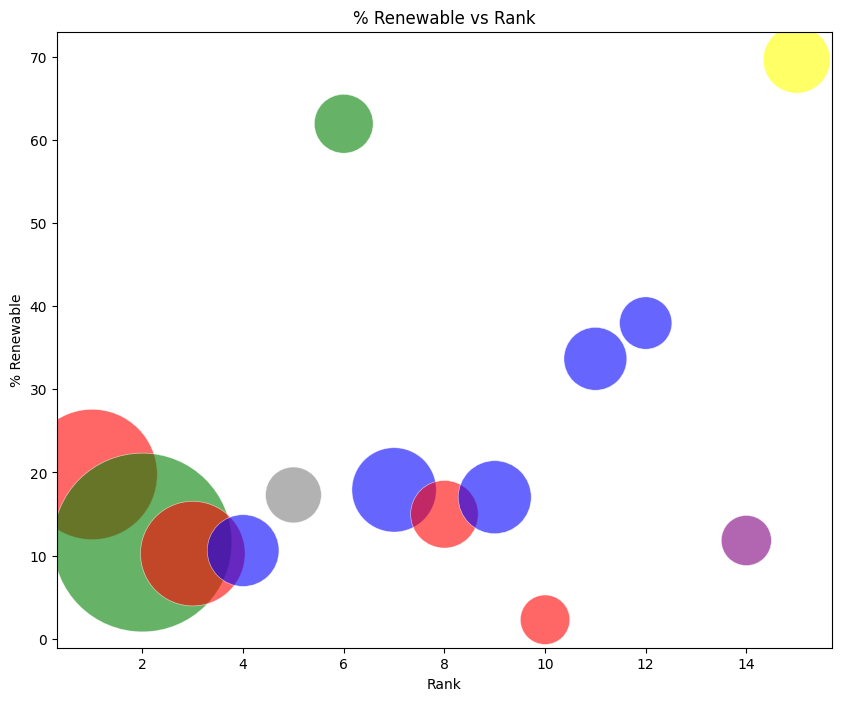

In [48]:
continent_dict = {
    'Asia': ['China', 'Japan', 'India', 'South Korea'],
    'Europe': ['Germany', 'France', 'United Kingdom', 'Italy', 'Spain'],
    'North America': ['United States', 'Canada'],
    'South America': ['Brazil', 'Argentina'],
    'Australia': ['Australia']
}

# Бульбашкова діаграма
import matplotlib.pyplot as plt

def bubble_chart(df, continent_dict):
    df['Continent'] = df.index.map(
        lambda country: next((key for key, countries in continent_dict.items() if country in countries), 'Other')
    )
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(
        df['Rank'], df['% Renewable'],
        s=df['2015'] / 1e9,  
        c=df['Continent'].map({'Asia': 'red', 'Europe': 'blue', 'North America': 'green', 
                               'South America': 'yellow', 'Australia': 'purple', 'Other': 'gray'}),
        alpha=0.6, edgecolors="w", linewidth=0.5
    )
    plt.title('% Renewable vs Rank')
    plt.xlabel('Rank')
    plt.ylabel('% Renewable')
    plt.show()


bubble_chart(final_data, continent_dict)
